# Product Recomendation System

Առաջարկությունների համակարգը բաղկացած է 3 մասից.


*   **Մաս 1**։ Ապրանքի վարկանիշի վրա հիմնված համակարգ, որը կենտրոնացած է նոր հաճախորդների վրա

․

*   **Մաս 2**։ Մոդելի վրա հիմնված *collaborative filtering system*, որը հիմնված է հաճախորդի գնումների պատմության և նմանատիպ ապրանքներ գնած այլ օգտվողների կողմից տրամադրված գնահատականների հիման վրա

․

*   **Մաս 3**։ Երբ ընկերությունն առաջին անգամ ստեղծում է իր էլեկտրոնային առևտրի կայքը ՝ առանց որևէ ապրանքի դասակարգման



## Մաս 1

* Առաջարկությունների համակարգ, որը հիմնված է 
ապրանքի հանրաճանաչության վրա, որը կենտրոնացած է նոր հաճախորդների վրա։

* Dataset: [Amazon product review dataset](https://drive.google.com/file/d/1T-ftWe8P4BrGtuv4JTr3y0e7eMNfU5Nr/view?usp=sharing)

Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

Loading the dataset

In [4]:
amazon_ratings = pd.read_csv('/content/drive/MyDrive/datasets/ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [5]:
amazon_ratings.shape

(2023070, 4)

In [7]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(5)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088


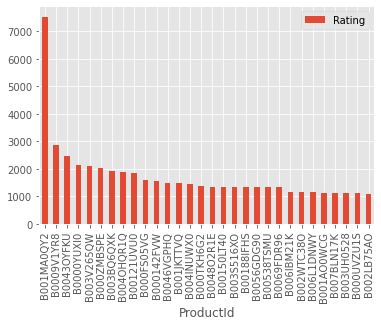

In [8]:
most_popular.head(30).plot(kind='bar')

Վերլուծություն:


*   Վերոնշյալ գրաֆիկը մեզ ցույց է տալիս վաճառվող ամենատարածված ապրանքները (դասավորված ըստ նվազման կարգի):

.

Օրինակ.`
* B001MA0QY2 ID-ով արտադրանքը ունի ավելի քան 7000 վաճառք, # B0009V1YR8 ID-ով հաջորդ ամենատարածված արտադրանքը ունի 3000 վաճառք և այլն:



## Մաս 2

**Model-based collaborative filtering system**

*   Առաջարկել ապրանքներ օգտվողներին ՝ հիմնվելով գնումների պատմության և այլ օգտվողների կողմից տրամադրված գնահատականների նմանության հիման վրա։

․

*   Այն օգնում է կանխատեսել որոշակի արտադրանք՝ օգտագործողի համար' օգտագործողի բազմաթիվ տվյալների հիման վրա։




In [9]:
amazon_ratings1 = amazon_ratings.head(10000)

In [14]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', 
                                                     index='UserId', 
                                                     columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
ratings_utility_matrix.shape

(9697, 886)

In [16]:
# Transposing
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X.shape

(886, 9697)

In [18]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

Correlation Matrix

In [21]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [24]:
X.index[100]

'6117043058'

In [25]:
i = '6117043058'

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

100

In [26]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [27]:
Recommend = list(X.index[correlation_product_ID > 0.90])

In [28]:
Recommend.remove(i) 

Ապրանքի ID
* Ահա 10 լավագույն ապրանքները, որոնք կցուցադրվեն 
վերը նշված հաճախորդին՝ առաջարկությունների համակարգով՝ հիմնվելով կայքում այլ հաճախորդների գնումների պատմության վրա:

In [32]:
Recommend[0:9]

['0205616461',
 '0558925278',
 '0737104473',
 '1304146537',
 '1304168522',
 '1304196070',
 '1304351475',
 '1304482596',
 '1304482634']

## Մաս 3

**Search engine based recommendation system**


* Երբ չունենք ապրանքների գնումների 
պատմություն, օգտագործողների համար կարող է մշակվել որոնման համակարգի վրա հիմնված առաջարկությունների համակարգ: Ապրանքի առաջարկությունները կարող են հիմնված լինել ապրանքի նկարագրության մեջ տրված տեքստի կլաստերավորման վերլուծության վրա:

.

* Dataset: [Home Depot's dataset with product dataset.](https://www.kaggle.com/c/home-depot-product-search-relevance/data?select=product_descriptions.csv.zip)

Importing libraries

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [34]:
#for dowload this dataset visit here: https://drive.google.com/file/d/1g30QKqyaEI9GreKqHP0CF3DtWCZ_D4t1/view?usp=sharing

product_descriptions = pd.read_csv('/content/drive/MyDrive/datasets/product_descriptions.csv')
product_descriptions.shape

(124428, 2)

In [36]:
product_descriptions = product_descriptions.dropna() # remove null values
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [39]:
product_descriptions1 = product_descriptions.head(500)
product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [40]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

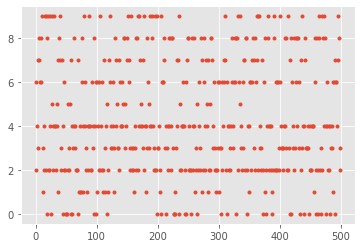

In [41]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [42]:
def print_cluster(i):
  print("Cluster %d: "% i),
  for ind in order_centroids[i,:10]:
    print(' %s' % terms[ind]),
  print

In [44]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print('Top terms per cluster: ')
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
  print_cluster(i)

Top terms per cluster: 
Cluster 0: 
 steel
 frame
 brass
 dining
 water
 soap
 patio
 collection
 sink
 cushions
Cluster 1: 
 wood
 door
 proposition
 nbsp
 residents
 california
 65
 painted
 hole
 ft
Cluster 2: 
 fence
 post
 vinyl
 gate
 ft
 screen
 kit
 36
 ladder
 spline
Cluster 3: 
 water
 concrete
 ft
 use
 paint
 used
 brush
 provides
 seal
 finish
Cluster 4: 
 cutting
 light
 power
 tool
 saw
 cut
 battery
 lithium
 m12
 led
Cluster 5: 
 metal
 wall
 screws
 screw
 drill
 azek
 track
 speaker
 bit
 single
Cluster 6: 
 tape
 water
 insulation
 heater
 toilet
 flush
 tank
 bowl
 easy
 gas
Cluster 7: 
 rug
 vary
 slightly
 center
 patterns
 bamboo
 order
 collection
 dimensions
 stakes
Cluster 8: 
 storage
 shelves
 lbs
 easy
 adjustable
 shelf
 duty
 heavy
 finish
 unit
Cluster 9: 
 air
 ft
 power
 control
 light
 fan
 cooling
 easy
 installation
 cooking


In [45]:
def show_recommendations(product):
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    print_cluster(prediction[0])

In [46]:
show_recommendations("cutting tool")

Cluster 4: 
 cutting
 light
 power
 tool
 saw
 cut
 battery
 lithium
 m12
 led


In [47]:
show_recommendations("spray paint")

Cluster 3: 
 water
 concrete
 ft
 use
 paint
 used
 brush
 provides
 seal
 finish


In [48]:
show_recommendations("steel drill")

Cluster 5: 
 metal
 wall
 screws
 screw
 drill
 azek
 track
 speaker
 bit
 single
